# Higher Education DataHub: Online Education Data
### Use Case for Arnold Foundation
### By Charlie Eaton and Laura Hamilton, UC Merced

##  Specify Notebook settings and pull data from IPEDS

In [1]:
%set graph_format svg

In [2]:
quietly {
            forvalues year=2011/2019 {  
copy https://nces.ed.gov/ipeds/datacenter/data/IC`year'_Data_Stata.zip IC`year'_Data_Stata.zip, replace
unzipfile IC`year'_Data_Stata, replace
quietly insheet using ic`year'_data_stata.csv, clear
            drop x*
            gen year=`year'
        save ic`year', replace
}
     forvalues year=2012/2018 {  
    copy https://nces.ed.gov/ipeds/datacenter/data/EF`year'A_DIST_Data_Stata.zip EF`year'A_DIST_Data_Stata.zip, replace
unzipfile EF`year'A_DIST_Data_Stata, replace
quietly insheet using ef`year'a_dist_data_stata.csv, clear
            drop x*
         keep if efdelev==2
            gen year=`year'
        save ef`year'a_dist, replace
    }
}

In [3]:
quietly {
    set more off
copy https://nces.ed.gov/ipeds/datacenter/data/EF90_A_Data_Stata.zip EF90_A_Data_Stata.zip, replace
unzipfile EF90_A_Data_Stata, replace
insheet using ef90_a_data_stata.csv, clear
keep if line==20
save ptu1990a, replace 
    
foreach year in 1980 1986 1988 1991 1992 1993 {
copy https://nces.ed.gov/ipeds/datacenter/data/EF`year'_A_Data_Stata.zip EF`year'_A_Data_Stata.zip, replace
unzipfile EF`year'_A_Data_Stata, replace
insheet using ef`year'_a_data_stata.csv, clear
keep if line==20
save ptu`year'a, replace
    }
forvalues year=2000/2018 {
copy https://nces.ed.gov/ipeds/datacenter/data/EF`year'A_Data_Stata.zip EF`year'A_Data_Stata.zip, replace
unzipfile EF`year'A_Data_Stata, replace
insheet using ef`year'a_data_stata.csv, clear
keep if line==20
save ptu`year'a, replace
    }
forvalues year = 95/99 {
copy https://nces.ed.gov/ipeds/datacenter/data/EF`year'_ANR_Data_Stata.zip EF`year'_ANR_Data_Stata.zip, replace
unzipfile EF`year'_ANR_Data_Stata, replace
insheet using ef`year'_anr_data_stata.csv, clear
keep if line==20
save ptu19`year'a, replace
    }
quietly copy https://nces.ed.gov/ipeds/datacenter/data/EF1994_ANR_Data_Stata.zip EF1994_ANR_Data_Stata.zip, replace
unzipfile EF1994_ANR_Data_Stata, replace
quietly insheet using ef1994_anr_data_stata.csv, clear
keep if line==20
save ptu1994a, replace
    
copy https://nces.ed.gov/ipeds/datacenter/data/EF90_A_Data_Stata.zip EF90_A_Data_Stata.zip, replace
unzipfile EF90_A_Data_Stata, replace
insheet using ef90_a_data_stata.csv, clear
keep if line==8
save ftu1990a, replace 
    
foreach year in 1980 1986 1988 1991 1992 1993 {
copy https://nces.ed.gov/ipeds/datacenter/data/EF`year'_A_Data_Stata.zip EF`year'_A_Data_Stata.zip, replace
unzipfile EF`year'_A_Data_Stata, replace
insheet using ef`year'_a_data_stata.csv, clear
keep if line==8
save ftu`year'a, replace
    }
forvalues year=2000/2018 {
copy https://nces.ed.gov/ipeds/datacenter/data/EF`year'A_Data_Stata.zip EF`year'A_Data_Stata.zip, replace
unzipfile EF`year'A_Data_Stata, replace
insheet using ef`year'a_data_stata.csv, clear
keep if line==8
save ftu`year'a, replace
    }
forvalues year = 95/99 {
copy https://nces.ed.gov/ipeds/datacenter/data/EF`year'_ANR_Data_Stata.zip EF`year'_ANR_Data_Stata.zip, replace
unzipfile EF`year'_ANR_Data_Stata, replace
insheet using ef`year'_anr_data_stata.csv, clear
keep if line==8
save ftu19`year'a, replace
    }
quietly copy https://nces.ed.gov/ipeds/datacenter/data/EF1994_ANR_Data_Stata.zip EF1994_ANR_Data_Stata.zip, replace
unzipfile EF1994_ANR_Data_Stata, replace
quietly insheet using ef1994_anr_data_stata.csv, clear
keep if line==8
save ftu1994a, replace
    }   

In [4]:
 quietly {
     foreach t in pt ft {
use `t'u1980a, clear
    keep unitid efrace*
    gen year=1980
foreach year in 1986 1988 1990 1991 1992 1993 1994 1995 ///
1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 {
    append using `t'u`year'a
    keep efrace* unitid year
    replace year=`year' if year==.
    }
    rename efrace03 `t'efbkaam
    rename efrace04 efbkaaw
    rename efrace05 efaianm
    rename efrace06 efaianw
    rename efrace07 efasiam
    rename efrace08 efasiaw
    rename efrace09 efhispm
    rename efrace10 efhispw
    rename efrace11 efwhitm
    rename efrace12 efwhitw
    rename efrace13 efunknm
    rename efrace14 efunknw
    rename efrace15 eftotlm
    rename efrace16 eftotlw
forvalues year = 2008/2018 {
append using `t'u`year'a
replace year=`year' if year==.
    }
drop efbkaat efaiant efasiat efhispt efwhitt eftotlt
egen `t'efbkaat = rowtotal (efbkaam efbkaaw), missing
egen `t'efaiant = rowtotal (efaianm efaianw), missing
egen `t'efasiat = rowtotal (efasiam efasiaw), missing
egen `t'efhispt = rowtotal (efhispm efhispw), missing
egen `t'efwhitt = rowtotal (efwhitm efwhitw), missing
egen `t'eftotlt = rowtotal (eftotlm eftotlw), missing
        **use old survey question for 2008 & 2009 schools that didnt change over
        replace `t'efbkaat=efrace18 if `t'efbkaat==.
        replace `t'efaiant=efrace19 if `t'efaiant==.
        replace `t'efasiat=efrace20 if `t'efasiat==.
        replace `t'efhispt=efrace21 if `t'efhispt==.
        replace `t'efwhitt=efrace22 if `t'efwhitt==.
    save `t'u19802018, replace
     }
    }

## Merge data to create online dataset

In [5]:
quietly {
set linesize 255
set more off 
use hd19802019, clear
** 1,200 for-profits reported under UNITID==247719 in 1986
drop if unitid==247719 & year==1986
merge 1:1 unitid year using ptu19802018, nogen
merge 1:1 unitid year using ftu19802018, keep(1 3)
merge 1:1 unitid year using "/Users/Charlie/Google Drive/Lincoln Project/IPEDS Disaggregated/Data/frosh_residence_1993_201920200502.dta", nogen
forvalues year=2012/2018 {
    merge 1:1 unitid year using ef`year'a_dist, nogen update
    }
    sort unitid year
    replace frosh_state_33pct=.
    replace frosh_state_33pct=1 if topfroshstate / total_frosh_res<.333
    by unitid: replace frosh_state_33pct=frosh_state_33pct[_n+1] if frosh_state_33pct==. & fteftotlt!=.
    by unitid: replace frosh_state_33pct=frosh_state_33pct[_n+1] if frosh_state_33pct!=frosh_state_33pct[_n+1] & frosh_state_33pct[_n+1]==frosh_state_33pct[_n-1]
    by unitid: replace frosh_state_33pct=frosh_state_33pct[_n+2] if frosh_state_33pct!=frosh_state_33pct[_n+2] & frosh_state_33pct[_n+2]==frosh_state_33pct[_n-1] 
 forvalues year=2002/2019 {
merge 1:1 unitid year using ic`year', nogen update
    }
foreach var in efbkaat efhispt efwhitt {
    gen p_ft`var' = ft`var' / fteftotlt * 100
        gen p_pt`var' = pt`var' / pteftotlt * 100
}
    replace instnm=lower(instnm)
    save online19802019, replace
}

## Create online indicators from IPEDS data

In [1]:
quietly use online19802019, clear
quietly sort unitid year
quietly gen pctonline = efdeexc / efdetot
quietly gen mostonline2012=1 if pctonline!=. & pctonline>.5
quietly gen onlinename=1 if regexm(lower(instnm), "online")==1 | regexm(lower(instnm), "global")==1 | regexm(lower(instnm), "world")==1 | regexm(lower(instnm), "flex")==1
quietly bysort unitid: replace onlinename=. if pteftotlt[_n-1]==.
quietly replace dstnced1=. if dstnced1!=1
quietly replace distnced=1 if pctonline==1
quietly replace distnced=. if distnced!=1
quietly gen deming=1 if onlinename==1 | frosh_state_33pct==1 | distnced==1
quietly egen ueftotlt=rowtotal(fteftotlt pteftotlt)
quietly bysort unitid: egen maxiclevel=max(iclevel)
quietly gen onlineunder=ueftotlt if distnced==1 | onlinename==1
quietly replace onlineunder=ueftotlt if control==3 & frosh_state_33pct==1
quietly collapse (sum) mostonline2012 onlineunder dstnced1 distnced onlinename deming efdeexc, by(control year)
quietly     set scheme plotplainblind
quietly gen combined=distnced+onlinename if year>2010
quietly label var mostonline2012 "50% + online" 
 quietly label var combined "IPEDS/name"
quietly label var distnced "IPEDS"
quietly label var onlinename "name"
quietly label var dstnced1 "any online"
quietly label var deming "IPEDS/name/Deming"
quietly replace deming=. if control!=3
foreach var in combined mostonline2012 distnced onlinename deming {
quietly replace `var'=. if `var'==0
}

## Plot counts of online schools by sector using different indicators

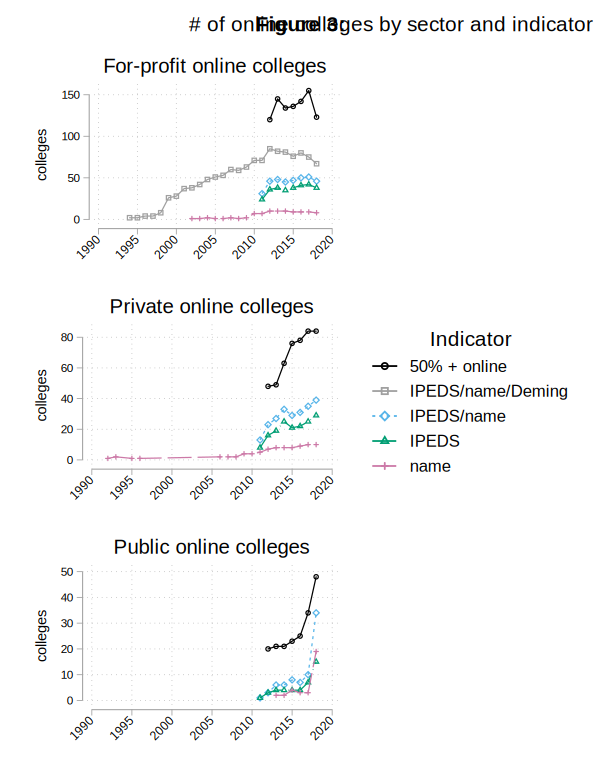

In [14]:
quietly tw (connect mostonline2012 deming combined distnced onlinename  year if control==3 & year>1989 & year<2019, sort ///
xlabel(1990(5)2020, ang(45)) ytitle("colleges") xtitle("") name(forprofit, replace) ///
title(For-profit online colleges, size(large)) note("") legend(subtitle(Indicator))) 
quietly tw (connect mostonline2012 deming combined distnced onlinename  year if control==2 & year>1989 & year<2019, sort ///
legend(off) xlabel(1990(5)2020, ang(45)) ytitle("colleges") xtitle("") name(private, replace) ///
title(Private online colleges, size(large)) note(""))
quietly tw (connect mostonline2012 deming combined distnced onlinename  year if control==1 & year>1989 & year<2019, sort ///
legend(off) xlabel(1990(5)2020, ang(45)) ytitle("colleges") xtitle("") name(public, replace) ///
title(Public online colleges, size(large)) note(""))
quietly grc1leg forprofit private public, cols(1) pos(3) ysize(11) xsize(8.5)  iscale(.7) title({bf:Figure 3:} # of online colleges by sector and indicator, span)
graph display, ysize(11) xsize(8.5)
quietly quietly graph export f3_onlineschoolcount.pdf, replace

## Plot undergrad enrollments at all online schools

In [15]:
quietly {
    drop if control==. | control<1
rename control control2
recode control2 (3=1) (2=2) (1=3), gen(control)
keep onlineunder efdeexc year control
reshape wide onlineunder efdeexc, i(year) j(control)
label var onlineunder3 "public"
label var onlineunder2 "private"
label var onlineunder1 "for-profit    "
label var efdeexc3 "public"
label var efdeexc2 "private"
label var efdeexc1 "for-profit    "   
}

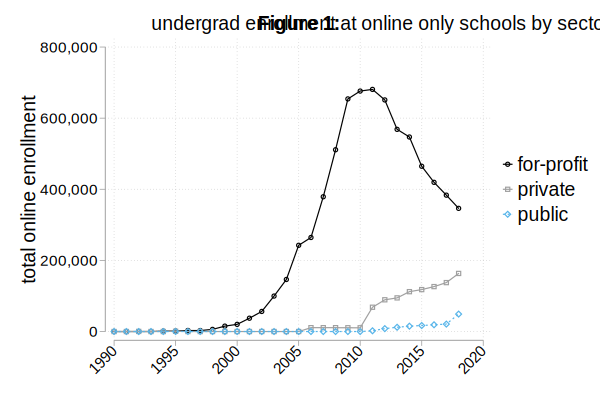

In [16]:
quietly tw (connect onlineunder* year if year>1989 & year<2019, sort ///
legend(pos(3) size(large)) xlabel(1990(5)2020, ang(45) labsize(medium)) ///
ytitle("total online enrollment" " " " ", size(large)) ylabel(, format(%7.0fc) labsize(medium)) ///
xtitle("") title({bf:Figure 1:} undergrad enrollment at online only schools by sector, size(large)) note(""))
graph display
quietly graph export f1_onlineenrollment.pdf, replace

## Plot exclusively online enrollments at 50%+ exclusively online schools

In [3]:
quietly use online19802019, clear
quietly sort unitid year
*table year control, c(sum efdeexc)

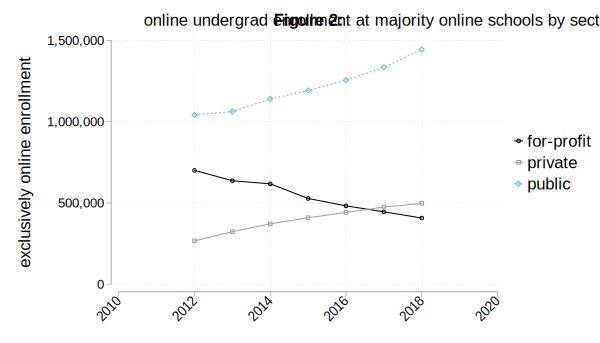

In [17]:
quietly tw (connect efdeexc* year if year>2011 & year<2019, sort ///
legend(pos(3) size(large)) xlabel(2010(2)2020, ang(45) labsize(medium)) ///
ytitle("exclusively online enrollment" " " " " "  ", size(large)) ylabel(, format(%10.0fc) labsize(medium)) ///
xtitle("") title({bf:Figure 2:} online undergrad enrollment at majority online schools by sector, size(large)) note(""))
graph display, xsize(7)
quietly graph export f2_onlineenrollment.pdf, replace

## Publics with 50%+ undergrads exclusively online in 2018

In [9]:
quietly use online19802019, clear
quietly sort instnm
quietly gen pctonline = efdeexc / efdetot
set line 250
set more off
list instnm pctonline if control==1 & pctonline!=. & pctonline>.3 & year==2018








        +---------------------------------------------------------------------------+
        |                                                         instnm   pctonl~e |
        |---------------------------------------------------------------------------|
  5840. |                                       albany technical college   .3895002 |
  6982. |                                 allen county community college   .5354331 |
 15110. |                               arizona state university-skysong   .9520819 |
 17811. |                                        athens state university   .6554593 |
 22994. |                                      barstow community college   .4302097 |
        |---------------------------------------------------------------------------|
 23130. |                                barton county community college   .4689639 |
 23618. |                                    bay mills community college   .4675052 |
 28539. |                                      

## Privates with 50%+ undergrads exclusively online in 2018

In [27]:
list instnm pctonline if control==2 ///
& pctonline!=. & pctonline>.5 & year==2018, string(45)

. list instnm pctonline if control==2 & pctonline!=. & pctonline>.5 & year==201
> 8, string(45)

        +------------------------------------------------------------+
        | instnm                                            pctonl~e |
        |------------------------------------------------------------|
  8257. | amberton university                               .8095238 |
  8375. | american academy mcallister institute of fune..   .7590909 |
  9533. | american college of financial services                   1 |
 12061. | amridge university                                       1 |
 13319. | antioch university online                                1 |
        |------------------------------------------------------------|
 13675. | apex school of theology                           .9742931 |
 20273. | averett university-non-traditional programs       .9212329 |
 22208. | baptist missionary association theological se..        .55 |
 25214. | bellevue university                      